In [1]:
# Importing libraries
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Unzip file
import zipfile

# Test preprocessing related libraries
import re
import nltk

# Punctuation marks
import string

# Stop words
from nltk.corpus import stopwords
nltk.download('stopwords')

# Stemming and Stopwords
stemming = nltk.SnowballStemmer('english')
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load dataset
imbalanced_data = pd.read_csv("./data/imbalanced_data.csv")
raw_data = pd.read_csv("./data/raw_data.csv")

In [3]:
# Display top & last 5 rows of imbalanced data 
imbalanced_data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
# Display top & last 5 rows of raw data 
raw_data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [5]:
# Remove un-neccessary columns from both datasets 
imbalanced_data.drop(columns=['id'], axis=1, inplace=True)
raw_data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

# I made a few strategies to deal with data.

### 1. Understanding data
### 2. EDA
### 3. Data preprocessing
### 4. Model building, validation and evaluation
### 5. Model testing

## 1. Understanding Data

In [6]:
class DataExplain:
    def __init__(self, df):
        self.data = df
    
    def data_looks(self):
        print(f"\t\t\t How data does looks like")
        print(f"\t\t\t Top 5 rows of data: \n")
        print(self.data.head())
        print('-'*90, '\n')
        print(f"\t\t\t Random 5 rows of data: \n")
        print(self.data.sample(5))
        print('-'*90, '\n')
        print(f"\t\t\t Last 5 rows of data: \n")
        print(self.data.tail())
        print('-'*90, '\n')

    
    def columns_and_types(self):
        print(f"\t\t\t Data shape (rows & columns): \n")
        print(self.data.shape)
        print('-'*45, '\n')
        
        print(f"\t\t\t Data columns name: \n")
        print(self.data.columns)
        print('-'*45, '\n')

        print(f"\t\t\t Data columns types: \n")
        print(self.data.info())
        print('-'*45, '\n')
    
    def missing_and_duplicate(self):
        print(f"\t\t\t Data missing values: \n")
        print(self.data.isnull().sum()*100)
        print('-'*45, '\n')

        print(f"\t\t\t Data duplicate values: \n")
        print(self.data.duplicated().sum())
        print('-'*45, '\n')


In [7]:
# class object of imbalanced_data
dataexplian = DataExplain(imbalanced_data)

In [8]:
# Display top, random, and last 5 rows of imbalanced_data
dataexplian.data_looks()

			 How data does looks like
			 Top 5 rows of data: 

   label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation
------------------------------------------------------------------------------------------ 

			 Random 5 rows of data: 

       label                                              tweet
7858       0   gig tiiiiime #emmalouandtheagenda #gig #music   
30366      0   @user we are   to be #playing at the #openair...
26152      0  maybe someday #relax #remember #instamoment #i...
19537      0  so after my exam this morning i've had a lovel...
29465      0  #babies   evenflo lux24 travel system with lit...
-------------------------------------------------------------------------------

In [9]:
# Display shape, columns_name and columns types of imbalanced_data
dataexplian.columns_and_types()

			 Data shape (rows & columns): 

(31962, 2)
--------------------------------------------- 

			 Data columns name: 

Index(['label', 'tweet'], dtype='object')
--------------------------------------------- 

			 Data columns types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB
None
--------------------------------------------- 



In [10]:
# Display missing and duplicate values in imbalanced_data
dataexplian.missing_and_duplicate()

			 Data missing values: 

label    0
tweet    0
dtype: int64
--------------------------------------------- 

			 Data duplicate values: 

2432
--------------------------------------------- 



In [11]:
# class object of raw_data
dataexplian = DataExplain(raw_data)

In [12]:
# Display top, random, and last 5 rows of raw_data
dataexplian.data_looks()

			 How data does looks like
			 Top 5 rows of data: 

   count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
------------------------------------------------------------------------------------------ 

			 Random 5 rows of data: 

       count  hate_speech  offensive_language  neither  class  \
2920       3            0                   2        1      1

In [13]:
# Display shape, columns_name and columns types of raw_data
dataexplian.columns_and_types()

			 Data shape (rows & columns): 

(24783, 6)
--------------------------------------------- 

			 Data columns name: 

Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet'],
      dtype='object')
--------------------------------------------- 

			 Data columns types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB
None
--------------------------------------------- 



In [14]:
# Display missing and duplicate values in raw_data
dataexplian.missing_and_duplicate()

			 Data missing values: 

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64
--------------------------------------------- 

			 Data duplicate values: 

0
--------------------------------------------- 



## 2. EDA

In [15]:
# imbalanced_data label values
imbalanced_data['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

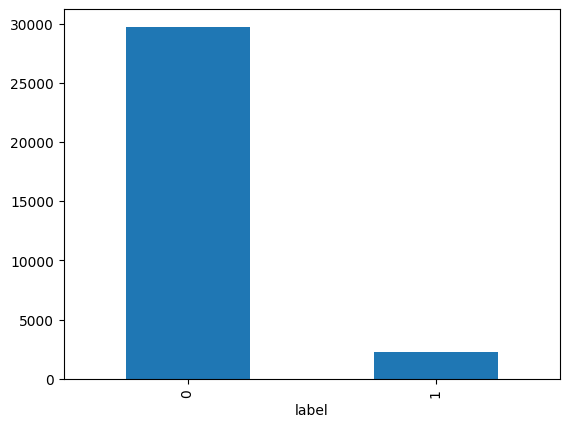

In [16]:
# Bar chart of imbalanced_data column 'label'
imbalanced_data['label'].value_counts().plot(kind= 'bar')
plt.show()

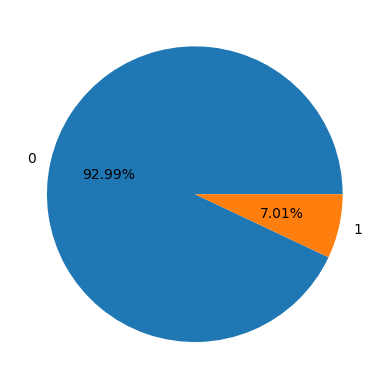

In [17]:
# Pie chart imbalanced_data column 'label'
labels = imbalanced_data['label'].value_counts().index
plt.pie(imbalanced_data['label'].value_counts(), labels=labels, autopct="%.2f%%")
plt.show()

### Observation:

- label 0: no hate
- label 1: hate

In [18]:
# raw_data values
raw_cols = ['count', 'hate_speech', 'offensive_language', 'neither', 'class']
raw_data[raw_cols].value_counts()

count  hate_speech  offensive_language  neither  class
3      0            3                   0        1        13306
       1            2                   0        1         2815
       0            0                   3        2         2753
                    2                   1        1         1384
       2            1                   0        0         1009
                                                          ...  
9      1            0                   8        2            1
       6            0                   3        0            1
                    3                   0        0            1
       7            1                   1        0            1
       3            0                   6        2            1
Name: count, Length: 75, dtype: int64

In [19]:
# Drop columns which are not required
raw_data.drop(columns=['count', 'hate_speech', 'offensive_language', 'neither'], axis=1, inplace=True)

In [20]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [21]:
# raw_data class unique values
raw_data['class'].unique()

array([2, 1, 0], dtype=int64)

In [22]:
# raw_data class values
raw_data['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

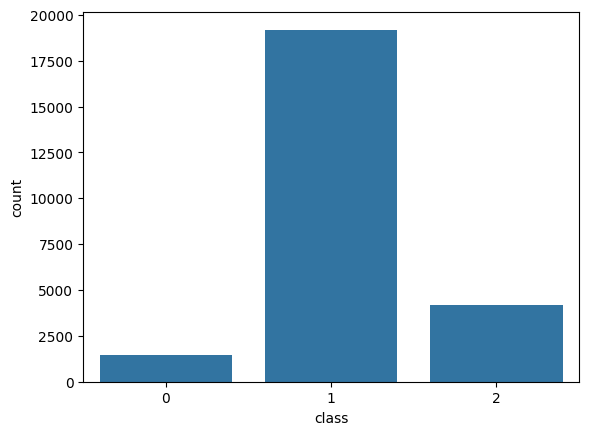

In [23]:
# Plotting the countplot on raw_data 'class' columns
sns.countplot(data= raw_data, x='class')
plt.show()

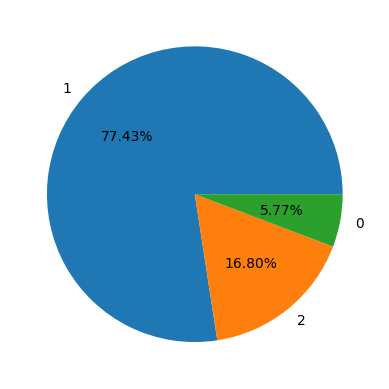

In [24]:
# Pie chart raw_data column 'class'
labels = raw_data['class'].value_counts().index
plt.pie(raw_data['class'].value_counts(), labels=labels, autopct="%.2f%%")
plt.show()

### Observation:

- class 0: hate
- class 1: abusive
- class 2: no hate

In [25]:
# Copy the values of class 1 into class 0.
raw_data[raw_data['class']==0]['class']==1

85       False
89       False
110      False
184      False
202      False
         ...  
24576    False
24685    False
24751    False
24776    False
24777    False
Name: class, Length: 1430, dtype: bool

In [26]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [27]:
raw_data['class'].unique()

array([2, 1, 0], dtype=int64)

In [28]:
# Check the value in class 0
raw_data[raw_data['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [29]:
# Replace the class 0 to class 1 value
raw_data['class'].replace({0: 1}, inplace=True)

In [30]:
raw_data['class'].unique()

array([2, 1], dtype=int64)

In [31]:
# Rename the class 2 to 0
raw_data['class'].replace({2: 0}, inplace=True)

In [32]:
# Change the class name into label
raw_data.rename(columns= {'class': 'label'}, inplace=True)

In [33]:
# Merge the both datasets
final_df = pd.concat([imbalanced_data, raw_data])

In [34]:
final_df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [35]:
# class object of final_df
dataexplian = DataExplain(final_df)

In [36]:
# Display top, random, and last 5 rows of final_df
dataexplian.data_looks()

			 How data does looks like
			 Top 5 rows of data: 

   label                                              tweet
0      0   @user when a father is dysfunctional and is s...
1      0  @user @user thanks for #lyft credit i can't us...
2      0                                bihday your majesty
3      0  #model   i love u take with u all the time in ...
4      0             factsguide: society now    #motivation
------------------------------------------------------------------------------------------ 

			 Random 5 rows of data: 

       label                                              tweet
1462       1  &#8220;@PaigeHardesty: A relationship is only ...
27523      0             ok but like imagine tristan as batman 
5112       0    #anniversary on sun #queensilvia &amp; #king...
25877      0  so happy and feeling so blessed :)   #jetblue ...
9873       1  @user #goodes  #bolt  it's not the job of thos...
-------------------------------------------------------------------------------

In [37]:
# Display shape, columns_name and columns types of final_df
dataexplian.columns_and_types()

			 Data shape (rows & columns): 

(56745, 2)
--------------------------------------------- 

			 Data columns name: 

Index(['label', 'tweet'], dtype='object')
--------------------------------------------- 

			 Data columns types: 

<class 'pandas.core.frame.DataFrame'>
Index: 56745 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   56745 non-null  int64 
 1   tweet   56745 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB
None
--------------------------------------------- 



In [38]:
# Display missing and duplicate values in final_df
dataexplian.missing_and_duplicate()

			 Data missing values: 

label    0
tweet    0
dtype: int64
--------------------------------------------- 

			 Data duplicate values: 

2432
--------------------------------------------- 



In [39]:
# final_df label unique values
final_df['label'].unique()

array([0, 1], dtype=int64)

In [40]:
# final_df label values
final_df['label'].value_counts()

label
0    33883
1    22862
Name: count, dtype: int64

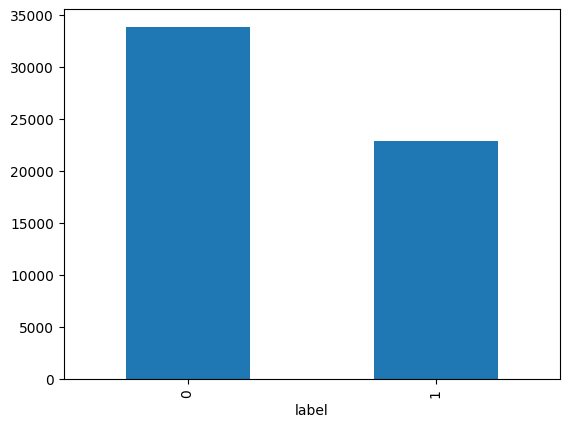

In [41]:
# Bar chart of final_df column 'label'
final_df['label'].value_counts().plot(kind= 'bar')
plt.show()

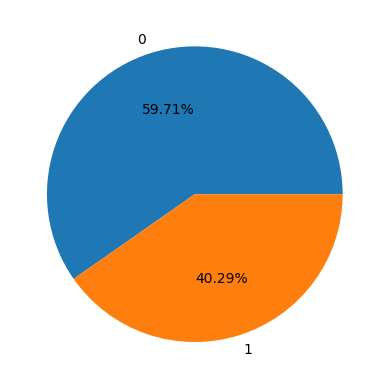

In [42]:
# Pie chart final_df column 'label'
labels = final_df['label'].value_counts().index
plt.pie(final_df['label'].value_counts(), labels=labels, autopct="%.2f%%")
plt.show()

## 3. Data preprocessing

### Basic Cleanup
- Remove HTML tags
- Convert Emoji
- Spell Checking
    - Fast type
    - Fat Fingure Type

### Basic Text Preparation
- Fundamental Basic
    - Number of Characters
    - Word Tokenization
    - Sentence Tokenization

- Optional
    - Lower Case
    - Remove Special Characters, Stop Words, Punctuation, and Digits
    - Stemming, Lemmatization
    - Language Detection

In [43]:
# Fetch number of characters with punctions, digits, and special characters
final_df['num_characters'] = final_df['tweet'].apply(len)

In [44]:
# Clean the text data
def data_clean(words):
    words = str(words).lower()
    words = re.sub(r'[^a-zA-Z0-9\s]', '', words)
    words = re.sub('\[.*?]', "", words)
    words = re.sub('https?://\S+|www\.\S+', "", words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(" ") if word not in stopword]
    words = [stemming.stem(word) for word in words]
    words = " ".join(words)
    return words

In [45]:
final_df['tweet'][1]

1    @user @user thanks for #lyft credit i can't us...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
Name: tweet, dtype: object

In [46]:
data_clean(" its #friday! Ã°ÂŸÂ˜Â€ smiles all around via ig user: @user #cookies make people    ")

' friday  smile around via ig user user cooki make peopl    '

In [47]:
# Apply data_clean function on tweet data
final_df['tweet_transformed'] = final_df['tweet'].apply(data_clean)

In [48]:
# Display the whole dataset
final_df

,label,tweet,num_characters,tweet_transformed
0,0,@user when a father is dysfunctional and is s...,102,user father dysfunct selfish drag kid dysfunc...
1,0,@user @user thanks for #lyft credit i can't us...,122,user user thank lyft credit cant use caus dont...
2,0,bihday your majesty,21,bihday majesti
3,0,#model i love u take with u all the time in ...,86,model love u take u time ur
4,0,factsguide: society now #motivation,39,factsguid societi motiv
...,...,...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,146,yous muthafin lie coreyemanuel right tl tras...
24779,0,"you've gone and broke the wrong heart baby, an...",70,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat!!.. dat nigguh like I ain...,67,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitches tellin you lies,37,youu got wild bitch tellin lie


In [49]:
# Make wordCloud
from wordcloud import WordCloud
wc = WordCloud(width = 700, height = 700, min_font_size = 10, background_color = 'white')

In [50]:
# Generate wordcloud on hate tweets
hate_wc = wc.generate(final_df[final_df['label'] == 1]['tweet_transformed'].str.cat(sep= " "))

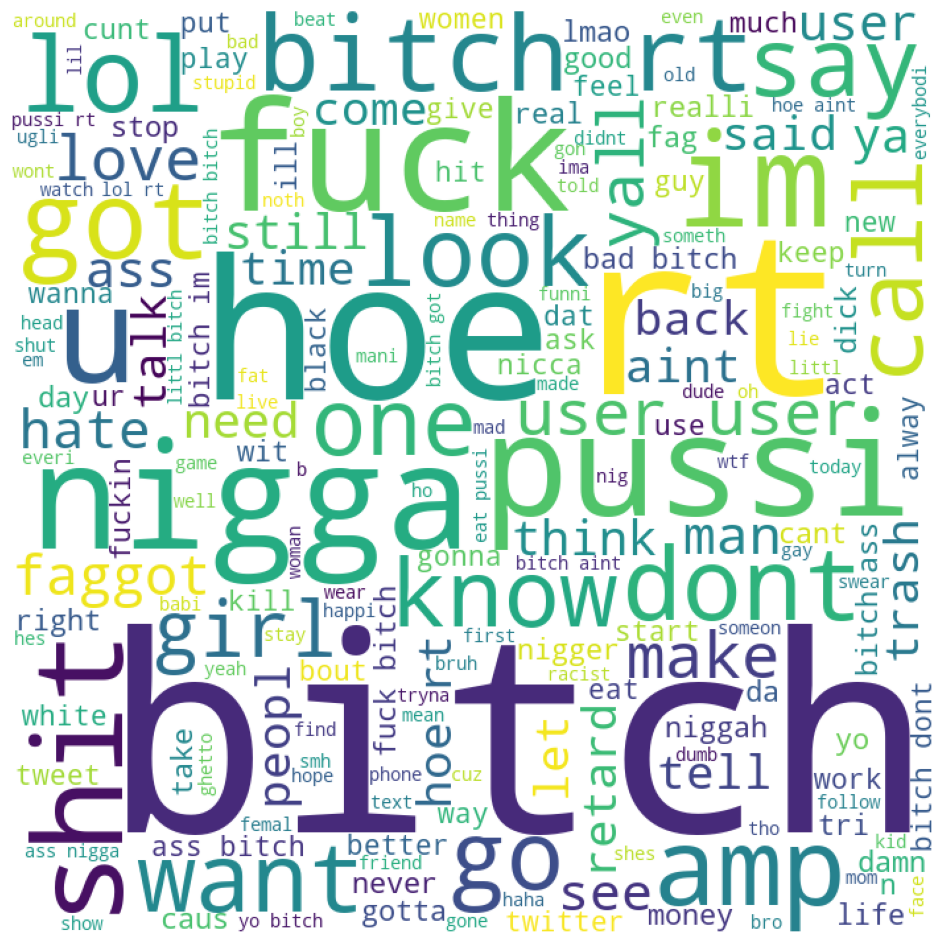

In [51]:
# Graph the word cloud of hate tweets
plt.figure(figsize=(25,12))
plt.imshow(hate_wc)
plt.style.use('classic')
plt.axis('off')
plt.show()

In [52]:
# Generate wordcloud on no-hate tweets
no_hate_wc = wc.generate(final_df[final_df['label'] == 0]['tweet_transformed'].str.cat(sep= " "))

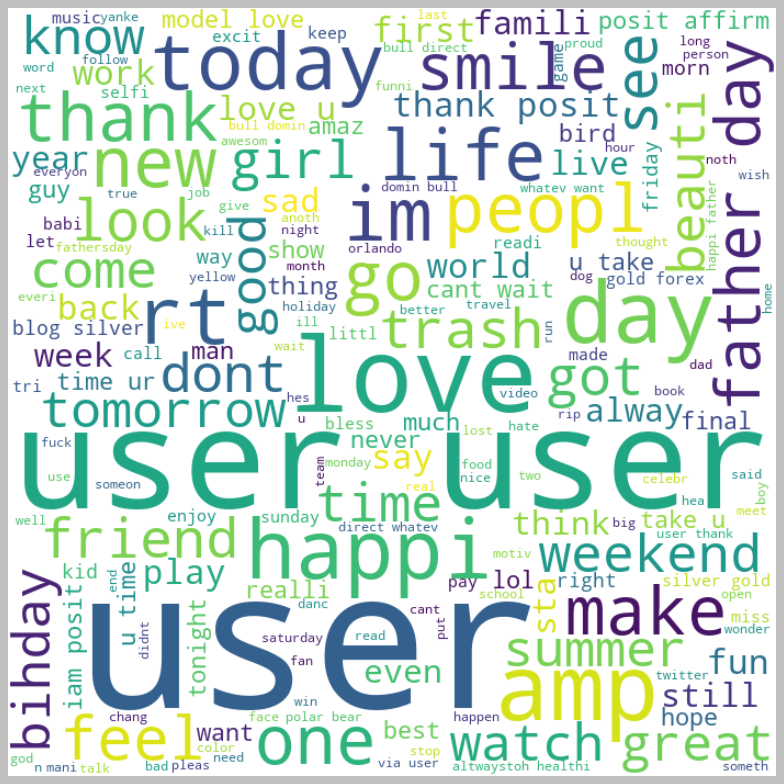

In [53]:
# Graph the word cloud of no-hate tweets
plt.figure(figsize=(25,12))
plt.imshow(no_hate_wc)
plt.style.use('classic')
plt.axis('off')
plt.show()

In [54]:
# Top occuring Words in hate tweets
hate_corpus = []

for tweet in final_df[final_df['label'] == 1]['tweet_transformed']:
    for word in tweet.split():
        hate_corpus.append(word)

In [55]:
# Length of hate tweets words
len(hate_corpus)

190517

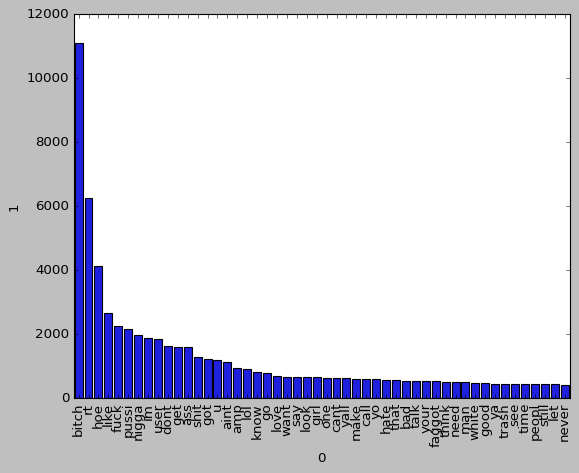

In [56]:
from collections import Counter

a = pd.DataFrame(Counter(hate_corpus).most_common(50))[0]
b = pd.DataFrame(Counter(hate_corpus).most_common(50))[1]

sns.barplot(x=a, y=b)
plt.xticks(rotation= 'vertical')
plt.show()

In [57]:
# Top occuring Words in no-hate tweets
no_hate_corpus = []

for tweet in final_df[final_df['label'] == 0]['tweet_transformed']:
    for word in tweet.split():
        no_hate_corpus.append(word)

In [58]:
# Length of no-hate tweets words
len(no_hate_corpus)

280437

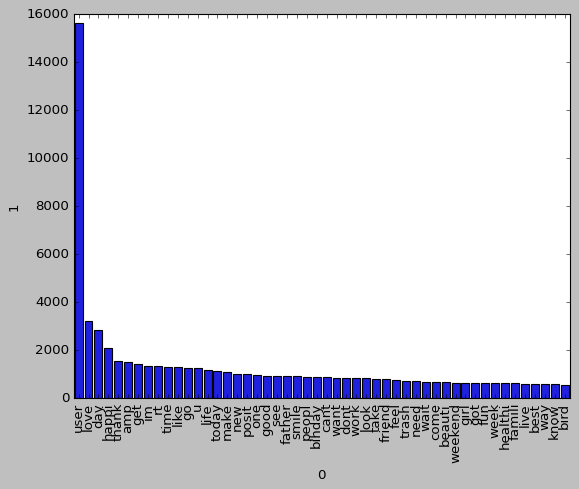

In [59]:
c = pd.DataFrame(Counter(no_hate_corpus).most_common(50))[0]
d = pd.DataFrame(Counter(no_hate_corpus).most_common(50))[1]

sns.barplot(x=c, y=d)
plt.xticks(rotation= 'vertical')
plt.show()

In [60]:
# Split data into X,y features
X = final_df['tweet_transformed']
y = final_df['label']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [63]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

45396 45396
11349 11349


## 3.1 Feature Engineering